# Things learned
- make functions and make them modifiable
- be able to track back your work
- don't mix eda with processed data eda

# 5 things to improve
- Do not mix up progression of notebook
- Make functions more adaptable when wanting to change things
- Stucture flow:
    - Preview data, baseline model, outline flow
    - Join multiple tables
    - Broad Eda
    - Functions to pair down/build up features
    - Make able to remove functionality if necessary
    - Add quick evaluation metric for rapid prototyping
- Save submission settings (maybe make copy of notebook)

# 5 things needed to compete
- think from multiple prespectives
- start small, and expand with option to remove expansion
- build methodically
- read forums after initilly doing eda
- keep track of data vs model changes, make a list append metric/model/variables, to csv

In [4]:
import pandas as pd
import numpy as np

# Pull in data

In [74]:
train = pd.read_csv('../Wnv/train.csv')
test = pd.read_csv('../Wnv/test.csv')

# Baseline for Train data

In [6]:
#baseline if predicting its not there, we'll be right 95% of the time
1 - train['WnvPresent'].mean()

0.94755377879307068

In [7]:
train['WnvPresent'].value_counts()

0    9955
1     551
Name: WnvPresent, dtype: int64

In [8]:
test['Id'].count()

116293

# Sample Submission - all 0's

In [9]:
sub = pd.DataFrame()
sub['Id'] = test['Id']

In [10]:
sub['WnvPresent'] = 0

In [11]:
sub.to_csv('sub.csv',index=False)

In [12]:
!ls

73data.csv					      sub5.csv.zip
mapdata_copyright_openstreetmap_contributors.rds      sub6.csv
mapdata_copyright_openstreetmap_contributors.txt      sub7.csv
mapdata_copyright_openstreetmap_contributors.txt.zip  sub8rf.csv
sampleSubmission.csv				      sub9.csv
sampleSubmission.csv.zip			      sub.csv
spray.csv					      test.csv
spray.csv.zip					      test.csv.zip
sub10.csv					      train.csv
sub11.csv					      train.csv.zip
sub13.csv					      weather.csv
sub14.csv					      weather.csv.zip
sub15.csv					      west_nile
sub16.csv					      west_nile.zip
sub2.csv					      WNV-Copy1.ipynb
sub3.csv					      WNV-Final Look.ipynb
sub4.csv					      WNV oops-Copy1.ipynb
sub4.csv.zip					      WNV oops.ipynb
sub5.csv


# EDA

In [14]:
train.head(1)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
Date                      10506 non-null object
Address                   10506 non-null object
Species                   10506 non-null object
Block                     10506 non-null int64
Street                    10506 non-null object
Trap                      10506 non-null object
AddressNumberAndStreet    10506 non-null object
Latitude                  10506 non-null float64
Longitude                 10506 non-null float64
AddressAccuracy           10506 non-null int64
NumMosquitos              10506 non-null int64
WnvPresent                10506 non-null int64
dtypes: float64(2), int64(4), object(6)
memory usage: 985.0+ KB


In [79]:
train.groupby('Trap')['WnvPresent'].mean().sort_values(ascending=False)#.plot.bar()

Trap
T143     0.193548
T006     0.166667
T005     0.142857
T233     0.140000
T014     0.133333
T096     0.120000
T003     0.114754
T015     0.114286
T235     0.112903
T054C    0.111111
T230     0.107692
T225     0.106796
T016     0.106061
T223     0.103448
T070     0.100000
T002     0.097297
T228     0.096774
T013     0.096154
T154     0.095238
T231     0.095238
T086     0.093023
T107     0.090909
T900     0.088000
T045     0.085714
T011     0.082707
T082     0.081633
T009     0.081081
T221     0.080357
T061     0.077670
T028     0.076923
           ...   
T238     0.000000
T025     0.000000
T019     0.000000
T219     0.000000
T129     0.000000
T040     0.000000
T078     0.000000
T100     0.000000
T099     0.000000
T141     0.000000
T094B    0.000000
T092     0.000000
T146     0.000000
T088     0.000000
T148     0.000000
T149     0.000000
T150     0.000000
T076     0.000000
T043     0.000000
T075     0.000000
T072     0.000000
T071     0.000000
T153     0.000000
T157     0.000000
T060 

# Unique Vals

In [16]:
for col in train.columns:
    print(col)
    print(train[col].unique())

Date
['2007-05-29' '2007-06-05' '2007-06-26' '2007-06-29' '2007-07-02'
 '2007-07-11' '2007-07-18' '2007-07-19' '2007-07-25' '2007-07-27'
 '2007-08-01' '2007-08-02' '2007-08-03' '2007-08-07' '2007-08-08'
 '2007-08-09' '2007-08-15' '2007-08-16' '2007-08-17' '2007-08-21'
 '2007-08-22' '2007-08-24' '2007-08-28' '2007-09-04' '2007-09-05'
 '2007-09-06' '2007-09-12' '2007-09-18' '2007-09-19' '2007-09-24'
 '2007-09-25' '2007-10-04' '2007-10-09' '2009-05-28' '2009-06-02'
 '2009-06-03' '2009-06-05' '2009-06-12' '2009-06-15' '2009-06-19'
 '2009-06-22' '2009-06-26' '2009-06-29' '2009-07-06' '2009-07-10'
 '2009-07-13' '2009-07-17' '2009-07-24' '2009-07-27' '2009-07-31'
 '2009-08-07' '2009-08-13' '2009-08-25' '2009-08-27' '2009-09-03'
 '2009-09-14' '2009-09-17' '2009-09-25' '2009-10-01' '2011-06-10'
 '2011-06-17' '2011-06-24' '2011-06-30' '2011-07-11' '2011-07-15'
 '2011-07-25' '2011-07-29' '2011-08-05' '2011-08-12' '2011-08-19'
 '2011-08-26' '2011-09-01' '2011-09-02' '2011-09-12' '2011-09-16'
 '201

# Some traps are more likely to get finding 

In [17]:
train.groupby(['Block'])['WnvPresent'].mean().sort_values(ascending=False).head()#.plot.bar()

Block
46    0.114754
72    0.106061
82    0.100000
41    0.097297
65    0.085470
Name: WnvPresent, dtype: float64

In [18]:
import seaborn as sns
#sns.heatmap(train.corr())
train.corr()['WnvPresent'].abs().sort_values(ascending=False)

WnvPresent         1.000000
NumMosquitos       0.196820
Longitude          0.060345
Latitude           0.028697
AddressAccuracy    0.008064
Block              0.004877
Name: WnvPresent, dtype: float64

# Some species don't carry WNV. Culex Pipens is the most likely

In [19]:
train.groupby(['Species'])['WnvPresent'].mean()

Species
CULEX ERRATICUS           0.000000
CULEX PIPIENS             0.088922
CULEX PIPIENS/RESTUANS    0.055135
CULEX RESTUANS            0.017883
CULEX SALINARIUS          0.000000
CULEX TARSALIS            0.000000
CULEX TERRITANS           0.000000
Name: WnvPresent, dtype: float64

In [20]:
train.groupby(['Species'])['NumMosquitos'].sum()

Species
CULEX ERRATICUS               7
CULEX PIPIENS             44671
CULEX PIPIENS/RESTUANS    66268
CULEX RESTUANS            23431
CULEX SALINARIUS            145
CULEX TARSALIS                7
CULEX TERRITANS             510
Name: NumMosquitos, dtype: int64

In [21]:
train.groupby(['Trap','WnvPresent'])['NumMosquitos'].mean().head()

Trap  WnvPresent
T001  0              1.666667
T002  0             19.221557
      1             27.777778
T003  0              8.944444
      1             27.142857
Name: NumMosquitos, dtype: float64

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


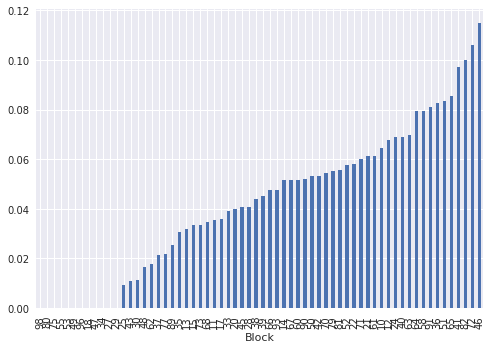

In [22]:
train.groupby(train['Block'])['WnvPresent'].mean().sort_values().plot.bar()

In [23]:
train.corr()['NumMosquitos'].sort_values(ascending=False).head()

NumMosquitos    1.000000
WnvPresent      0.196820
Longitude       0.036633
Block          -0.172388
Latitude       -0.184806
Name: NumMosquitos, dtype: float64

# Number of mosquitos found vs percent chance finding wnv. But this is not in the Test data so drop it

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


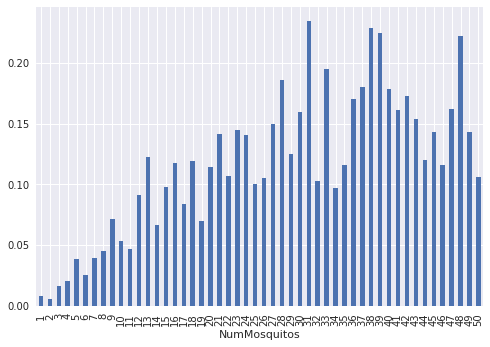

In [24]:
train.groupby(['NumMosquitos'])['WnvPresent'].mean().plot.bar()

# AddressAccuracy column doesn't seem helpful

In [25]:
train.groupby(['AddressAccuracy'])['WnvPresent'].value_counts()

AddressAccuracy  WnvPresent
3                0               90
                 1                1
5                0             1713
                 1               94
8                0             4387
                 1              241
9                0             3765
                 1              215
Name: WnvPresent, dtype: int64

# Both train and test combined, and weather then dummy

In [26]:
import pandas as pd

In [27]:
train = pd.read_csv('../Wnv/train.csv')
test = pd.read_csv('../Wnv/test.csv')
weath = pd.read_csv('../Wnv/weather.csv')

# Add Dfs together

In [28]:
both = pd.concat([train,test],axis=0)
both = pd.merge(both,weath,on='Date',how='inner')

# Clean data function: includes Month/Year, Dummy and Drop Cols

In [29]:
dummy_list = ['Species','Year','Month','Block','Trap']
drop_list = ['Date','AddressAccuracy','Address','Street','AddressNumberAndStreet']

In [40]:
def date(df):
    #convert to date
    df['Date'] = pd.to_datetime(df['Date'])
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year
    df['Day'] = df['Date'].dt.day
    df['Week'] = df['Date'].dt.week
    
#     both['Day_Binary'] = both['Day'].apply(day_thresh)
#     both['Week_Binary'] = both['Week'].apply(week_thresh)
#     both['Month_Binary'] = both['Month'].apply(month_thresh)
    return df
def clean(df,dummy_list,drop_list):
    #drop base case per dummies col
    for col in dummy_list:
        dummies = pd.DataFrame()
        dummies = pd.get_dummies(df[col]).rename(columns=lambda x: str(col) + '_' + str(x))
        drop_col = str(col) + '_' + str(df[col].unique()[-1])
        df = pd.concat([df, dummies], axis=1)
        del df[col]
        del df[drop_col]

    for col in drop_list:
        df.drop(col,axis=1,inplace=True)
    return df

# Choose Weath Variables

In [31]:
keep_list = ['Date','Tmax','Cool','WetBulb']

In [32]:
def clean_weath(weath,keep_list):
    weath = weath[weath['Station'] == 1]
    weath = weath[keep_list]
    #weath['PrecipTotal'] = weath['PrecipTotal'].str.replace('T','0')
    #weath['Tavg'] = weath['Tavg'].str.replace('M','0')
    #weath['StnPressure'] = weath['StnPressure'].str.replace('M','29')

    for col in weath.columns:
        if col != 'Date':
            weath[col] = pd.to_numeric(weath[col],errors='coerce')
    return weath

#weath = clean_weath(weath)

# Unique Weath

In [33]:
def uniq(df):
    for col in df.columns:
        print(col + ' is made of: ' + str(df[col].nunique()) + ' items')
        print(df[col].unique())
    return

In [34]:
#uniq(both)

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


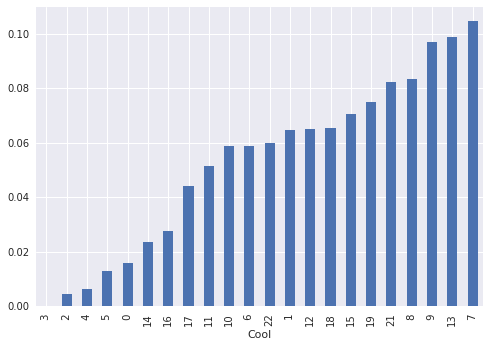

In [35]:
both.groupby('Cool')['WnvPresent'].mean().sort_values().plot.bar()

# Wetbulb and Tmax above .07 chance

In [41]:
both = date(both)

In [42]:
day_df = pd.DataFrame((both.groupby(['Day'])['WnvPresent'].mean() > .07))
day_list = day_df[day_df['WnvPresent'] == True].index

def day_thresh(day):
    if day in day_list:
        return 1
    else:
        return 0

#both['Day_Binary'] = both['Day'].apply(day_above)
#both = both.drop('Block',axis=1)

week_df = pd.DataFrame((both.groupby(['Week'])['WnvPresent'].mean() > .07))
week_list = week_df[week_df['WnvPresent'] == True].index

def week_thresh(week):
    if week in week_list:
        return 1
    else:
        return 0

#both['Week_Binary'] = both['Week'].apply(week_thresh)
#both = both.drop('Block',axis=1)

In [43]:
month_df = pd.DataFrame((both.groupby(['Month'])['WnvPresent'].mean() > .07))
month_list = month_df[month_df['WnvPresent'] == True].index

def month_thresh(month):
    if month in month_list:
        return 1
    else:
        return 0

#both['Week_Binary'] = both['Week'].apply(week_thresh)
#both = both.drop('Block',axis=1)

# Add Distance from Airport

In [19]:
!pip install geopy

    100% |████████████████████████████████| 71kB 1.8MB/s ta 0:00:01    92% |█████████████████████████████▌  | 61kB 2.0MB/s eta 0:00:01
You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import geopy.distance as d

def add_dist(both):
    subset = both[['Latitude','Longitude']]
    tuples = [tuple(x) for x in subset.values]
    both['Point'] = tuples

    def dist(point):
        return d.vincenty(point,Ohare).miles

    Ohare = (41.9742,-87.9073)
    both['d_airport'] = both['Point'].apply(dist)

#     both['d_airport'].max()

#     def dist(point):
#         return d.vincenty(point,Port).miles

    Port = (41.673408,-87.599862)
    both['d_port'] = both['Point'].apply(dist)

#     def dist(point):
#         return d.vincenty(point,NoRidge).miles

#     NoRidge = (41.95469,-87.800991)
#     both['d_noridge'] = both['Point'].apply(dist)

    #both[both['d_port'] < 5].groupby(['WnvPresent']).size()
    #both[both['d_airport'] < 5].groupby(['WnvPresent']).size()

    both.loc[both['d_airport'] < 3,'d_airport_1'] = 1
    both['d_airport_1'] = 0
    both['d_port_1'] = 0
    both.loc[both['d_port'] < 3,'d_port_1'] = 1
#     both['d_noridge_1'] = 0
#     both.loc[both['d_noridge'] < 2,'d_noridge_1'] = 1
    return both

In [537]:
both.columns

Index(['Id', 'Latitude', 'Longitude', 'NumMosquitos', 'WnvPresent', 'Cool',
       'Trap_Binary', 'Wetbulb_Binary', 'Block_Binary', 'Tmax_Binary',
       'Cool_Binary', 'Point', 'd_airport', 'd_port', 'd_airport_1',
       'd_port_1', 'Species_CULEX ERRATICUS', 'Species_CULEX PIPIENS',
       'Species_CULEX PIPIENS/RESTUANS', 'Species_CULEX RESTUANS',
       'Species_CULEX SALINARIUS', 'Species_CULEX TARSALIS',
       'Species_CULEX TERRITANS', 'Year_2007', 'Year_2008', 'Year_2009',
       'Year_2010', 'Year_2011', 'Year_2012', 'Year_2013', 'Month_5',
       'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Day_1', 'Day_2', 'Day_3',
       'Day_4', 'Day_5', 'Day_6', 'Day_7', 'Day_8', 'Day_9', 'Day_10',
       'Day_11', 'Day_12', 'Day_13', 'Day_14', 'Day_15', 'Day_16', 'Day_17',
       'Day_18', 'Day_19', 'Day_21', 'Day_22', 'Day_23', 'Day_24', 'Day_25',
       'Day_26', 'Day_27', 'Day_28', 'Day_29', 'Day_30', 'Day_31'],
      dtype='object')

# EDA on both full dataframe

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


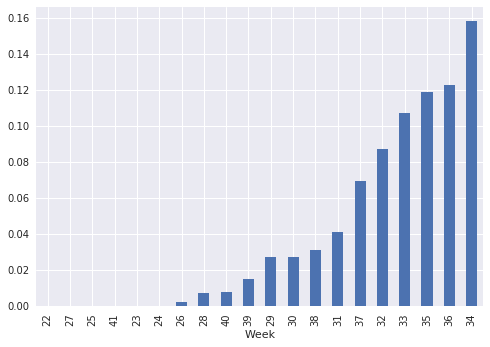

In [563]:
both.groupby('Week')['WnvPresent'].mean().sort_values().plot.bar()

In [499]:
both.columns

Index(['Unnamed: 0', 'Block', 'Id', 'Latitude', 'Longitude', 'NumMosquitos',
       'WnvPresent', 'Cool', 'Trap_Binary', 'Wetbulb_Binary',
       'Species_CULEX ERRATICUS', 'Species_CULEX PIPIENS',
       'Species_CULEX PIPIENS/RESTUANS', 'Species_CULEX RESTUANS',
       'Species_CULEX SALINARIUS', 'Species_CULEX TARSALIS',
       'Species_CULEX TERRITANS', 'Year_2007', 'Year_2008', 'Year_2009',
       'Year_2010', 'Year_2011', 'Year_2012', 'Year_2013', 'Month_5',
       'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Point', 'd_airport',
       'd_port', 'd_airport_1'],
      dtype='object')

# Lists to fudge with the functions below

In [59]:
keep_list = ['Date','Tmax','Cool','WetBulb']
dummy_list = ['Species','Month','Trap']
drop_list = ['Date','AddressAccuracy','Address','Street','AddressNumberAndStreet',
             'Tmax','WetBulb','Block','Year','Day']

# Rerun all data transform

In [60]:
train = pd.read_csv('../Wnv/train.csv')
test = pd.read_csv('../Wnv/test.csv')
weath = pd.read_csv('../Wnv/weather.csv')

weath = clean_weath(weath,keep_list)

both = pd.concat([train,test],axis=0)
both = pd.merge(both,weath,on='Date',how='inner')
both = date(both)

both['Trap_Binary'] = both['Trap'].apply(trap_above)
both['Wetbulb_Binary'] = both['WetBulb'].apply(wetbulb_tresh)
#both['Block_Binary'] = both['Block'].apply(block_above)
both['Tmax_Binary'] = both['Tmax'].apply(Tmax_tresh)
both['Cool_Binary'] = both['Cool'].apply(cool_thresh)
both['Day_Binary'] = both['Day'].apply(day_thresh)
both['Week_Binary'] = both['Week'].apply(week_thresh)
both['Month_Binary'] = both['Month'].apply(month_thresh)

both = add_dist(both)

both = clean(both,dummy_list,drop_list)

# for col in both.columns:
#     if col not in ['Id','WnvPresent']:
#         both.fillna(np.median(both[col]),inplace=True)
    


# Load Saved Data

In [660]:
both = pd.read_csv('../Wnv/73data.csv')
both = both.drop('Unnamed: 0',axis=1)
both.columns

Index(['Block', 'Id', 'Latitude', 'Longitude', 'NumMosquitos', 'WnvPresent',
       'Cool', 'Trap_Binary', 'Wetbulb_Binary', 'Species_CULEX ERRATICUS',
       'Species_CULEX PIPIENS', 'Species_CULEX PIPIENS/RESTUANS',
       'Species_CULEX RESTUANS', 'Species_CULEX SALINARIUS',
       'Species_CULEX TARSALIS', 'Species_CULEX TERRITANS', 'Year_2007',
       'Year_2008', 'Year_2009', 'Year_2010', 'Year_2011', 'Year_2012',
       'Year_2013', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9',
       'Point', 'd_airport', 'd_port', 'd_airport_1'],
      dtype='object')

In [46]:
both.columns

Index(['Id', 'Latitude', 'Longitude', 'NumMosquitos', 'WnvPresent', 'Cool',
       'Week', 'Trap_Binary', 'Wetbulb_Binary', 'Tmax_Binary', 'Cool_Binary',
       'Day_Binary', 'Week_Binary', 'Month_Binary', 'Point', 'd_airport',
       'd_port', 'd_airport_1', 'd_port_1', 'Species_CULEX ERRATICUS',
       'Species_CULEX PIPIENS', 'Species_CULEX PIPIENS/RESTUANS',
       'Species_CULEX RESTUANS', 'Species_CULEX SALINARIUS',
       'Species_CULEX TARSALIS', 'Species_CULEX TERRITANS', 'Month_5',
       'Month_6', 'Month_7', 'Month_8', 'Month_9'],
      dtype='object')

# Add Extract Train, Test

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [61]:
ss = StandardScaler()

#based on id
train = pd.DataFrame(both[both['Id'].isnull()])
test = pd.DataFrame(both[both['Id'].notnull()])

#train 
X = train.drop(['Id','NumMosquitos','WnvPresent','d_airport','d_port','Point'],axis=1)
y = train['WnvPresent']

#test 
z = test.drop(['Id','NumMosquitos','WnvPresent','d_airport','d_port','Point'],axis=1)

#scale
X = ss.fit_transform(X)

#split into test train
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

# Models

In [62]:
#train model on train/test to evaluate
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()#penalty='l2')
lr.fit(X_train,y_train)
y_pred_proba = lr.predict_proba(X_test)
y_pred = lr.predict(X_test)

#train the model on the test data to predict
lr.fit(X,y)
z_pred_proba = lr.predict_proba(z)

In [631]:
#gridsearchcv
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
kfold = KFold(n_splits=10, random_state=4)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
clf = GridSearchCV(cv=kfold,estimator=LogisticRegression(penalty='l2'),param_grid=param_grid)

clf.fit(X_train,y_train)
y_pred_proba = clf.predict_proba(X_test)
y_pred = clf.predict(X_test)

#best grid
lr = clf.best_estimator_
lr.fit(X_train,y_train)
y_pred_proba = lr.predict_proba(X_test)
y_pred = lr.predict(X_test)

In [68]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=250, min_samples_split=40)
rf.fit(X_train,y_train)
y_pred_proba = rf.predict_proba(X_test)
y_pred = rf.predict(X_test)

rf.fit(X,y)
z_pred_proba = rf.predict_proba(z)

# Confusion Matrix

0.835785876258


/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


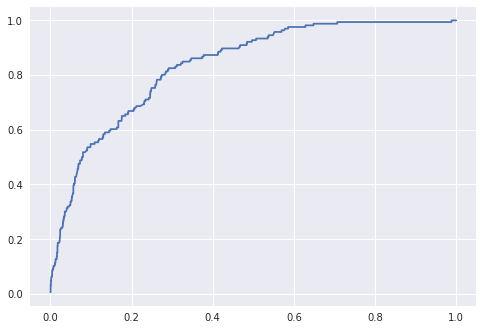

In [69]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

confusion_matrix(y_test,y_pred)
y_pred_proba[:,0]

import matplotlib.pyplot as plt
fpr, tpr, thresh = roc_curve(y_test,y_pred_proba[:,1])
print(roc_auc_score(y_test,y_pred_proba[:,1]))
plt.plot(fpr,tpr)

In [70]:
z_pred_proba

array([[ 0.94461487,  0.05538513],
       [ 0.95842475,  0.04157525],
       [ 0.95589657,  0.04410343],
       ..., 
       [ 0.93463949,  0.06536051],
       [ 0.93463949,  0.06536051],
       [ 0.93463949,  0.06536051]])

# Save Data, if good

In [71]:
#both.to_csv('73data.csv')

# Submission

In [72]:
sub5 = pd.DataFrame()
test['Id'] = test['Id'].astype(int)
ind = []
for i in range(116294):
    ind.append(i+1)
sub5 = pd.DataFrame(pd.concat([test['Id'],pd.DataFrame(z_pred_proba[:,1])],axis=1))
sub5.rename(columns={0:'WnvPresent'},inplace=True)
sub5['Id'] = pd.Series(ind)
sub5 = sub5[:116293]
sub5['Id'] = sub5['Id'].astype(int)
sub5.to_csv('sub16.csv',index=False)

In [73]:
sub5['WnvPresent'].mean()

0.083827058578754346